<a href="https://colab.research.google.com/github/everythingcanbedone/Image-Classification-with-CNN/blob/main/Copy_of_Fruit360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras import layers
import tensorflow as tf

In [ ]:
!pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download moltean/fruits

 99% 1.27G/1.28G [00:31<00:00, 58.2MB/s]
100% 1.28G/1.28G [00:31<00:00, 43.4MB/s]


In [ ]:
!unzip "/content/fruits.zip"

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [ ]:
img_height = 224
img_width = 224
batch_size = 16

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
        "/content/fruits-360-original-size/fruits-360-original-size/Training" , image_size = (img_height,img_width) , batch_size = batch_size)

Found 6231 files belonging to 24 classes.


In [ ]:
validation_ds = keras.utils.image_dataset_from_directory(
        "/content/fruits-360-original-size/fruits-360-original-size/Validation" , image_size = (img_height,img_width) , batch_size = batch_size)

Found 3114 files belonging to 24 classes.


In [ ]:
class_names = train_ds.class_names
class_names

['apple_6',
 'apple_braeburn_1',
 'apple_crimson_snow_1',
 'apple_golden_1',
 'apple_golden_2',
 'apple_golden_3',
 'apple_granny_smith_1',
 'apple_hit_1',
 'apple_pink_lady_1',
 'apple_red_1',
 'apple_red_2',
 'apple_red_3',
 'apple_red_delicios_1',
 'apple_red_yellow_1',
 'apple_rotten_1',
 'cabbage_white_1',
 'carrot_1',
 'cucumber_1',
 'cucumber_3',
 'eggplant_violet_1',
 'pear_1',
 'pear_3',
 'zucchini_1',
 'zucchini_dark_1']

# **Data Augmentation** 

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(224,
                                  224,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


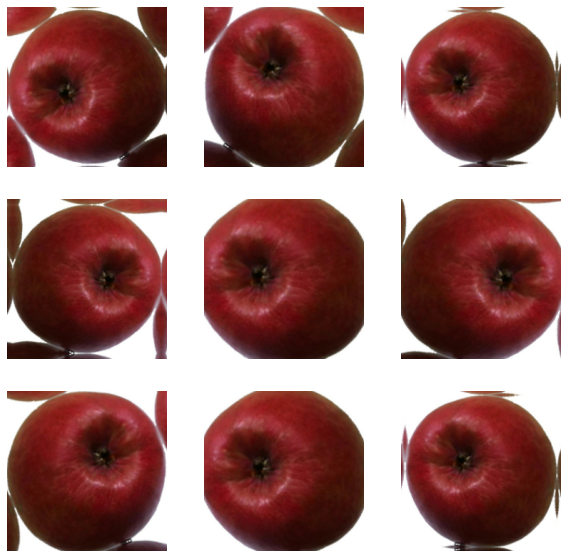

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(320, kernel_size=(3, 3),kernel_initializer='HeUniform', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(64, kernel_size=(3, 3),kernel_initializer='HeUniform', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(128, kernel_size=(3, 3),kernel_initializer='HeUniform', activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(256, kernel_size=(3, 3),kernel_initializer='HeUniform', activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024,kernel_initializer='HeNormal', activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(512,kernel_initializer='HeNormal', activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(len(class_names),activation='softmax')
])

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
  loss='SparseCategoricalCrossentropy',
  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 222, 320)     8960      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 320)    0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      184384    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data = validation_ds,
    epochs = epochs
)

Epoch 1/10
390/390 [==============================] - 80s 172ms/step - loss: 1.8698 - accuracy: 0.4218 - val_loss: 0.5175 - val_accuracy: 0.8243
Epoch 2/10
390/390 [==============================] - 66s 167ms/step - loss: 0.4474 - accuracy: 0.8544 - val_loss: 0.3059 - val_accuracy: 0.8979
Epoch 3/10
390/390 [==============================] - 66s 168ms/step - loss: 0.2481 - accuracy: 0.9124 - val_loss: 0.0891 - val_accuracy: 0.9708
Epoch 4/10
390/390 [==============================] - 66s 169ms/step - loss: 0.1517 - accuracy: 0.9451 - val_loss: 0.1630 - val_accuracy: 0.9396
Epoch 5/10
390/390 [==============================] - 66s 169ms/step - loss: 0.1158 - accuracy: 0.9607 - val_loss: 0.2084 - val_accuracy: 0.9261
Epoch 6/10
390/390 [==============================] - 66s 169ms/step - loss: 0.0974 - accuracy: 0.9684 - val_loss: 0.0405 - val_accuracy: 0.9849
Epoch 7/10
390/390 [==============================] - 66s 169ms/step - loss: 0.1074 - accuracy: 0.9652 - val_loss: 0.1135 - val_ac

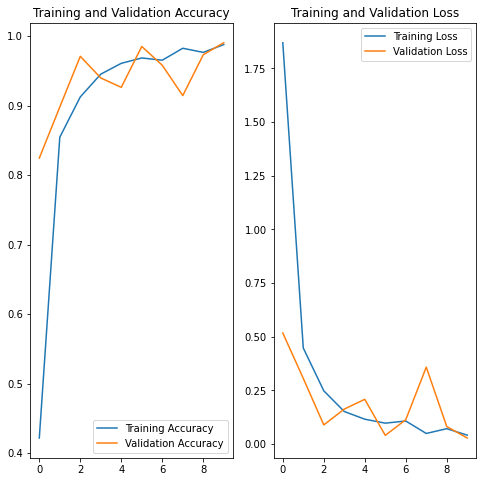

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
img = tf.keras.utils.load_img(
    "/content/fruits-360-original-size/fruits-360-original-size/Test/carrot_1/r0_115.jpg", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to carrot_1 with a 10.57 percent confidence.


In [ ]:
model.save("Fruit(224,224).h5")